# Visualization with Small sample dataset as demo

## 1. Unzip sample dataset

In [1]:
%cd data

/home/kang/SAR_OD/anonymous-hub/SAROD/data


In [2]:
!bash download_for_Demo.sh

download_for_Demo.sh: line 2: $'\r': command not found
Downloading...
From: https://drive.google.com/uc?id=1TIhupsTTtdPHjFzYTVejLyyPo9UzrSk3
To: /home/kang/SAR_OD/anonymous-hub/SAROD/data/HRSID_sample.zip
33.5MB [00:00, 47.9MB/s]


In [3]:
!unzip HRSID_sample.zip

Archive:  HRSID_sample.zip
replace dt_ver/test/images/P0001_0_800_10190_10990_0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [4]:
%cd ..

/home/kang/SAR_OD/anonymous-hub/SAROD


## 2. test & save images with sample dataset

In [10]:
!python visual.py --device 0\
--rl_weight SAROD_RL\
--h_detector_weight yolov5_480.pt\
--l_detector_weight yolov5_96.pt\
--test_path data/test/images

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
GPU device for EfficientOD:  True
loaded agent from SAROD_RL
Your branch is behind 'origin/main' by 12 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)


                 from  n    params  module                                  arguments                     
  0                -1  1      8800  yolov5.models.common.Focus              [3, 80, 3]                    
  1                -1  1    115520  yolov5.models.common.Conv               [80, 160, 3, 2]               
  2                -1  1    315680  yolov5.models.common.BottleneckCSP      [160, 160, 4]                 
  3                -1  1    461440  yolov5.models.common.Conv               [160, 320, 3, 2]              
  4                -1  1   3311680  yolov5.models.common.BottleneckCSP      [320, 320, 12]                
  5                -1  1   1844480  yolov5.models.common.Conv               [320, 640

<Figure size 432x288 with 0 Axes>

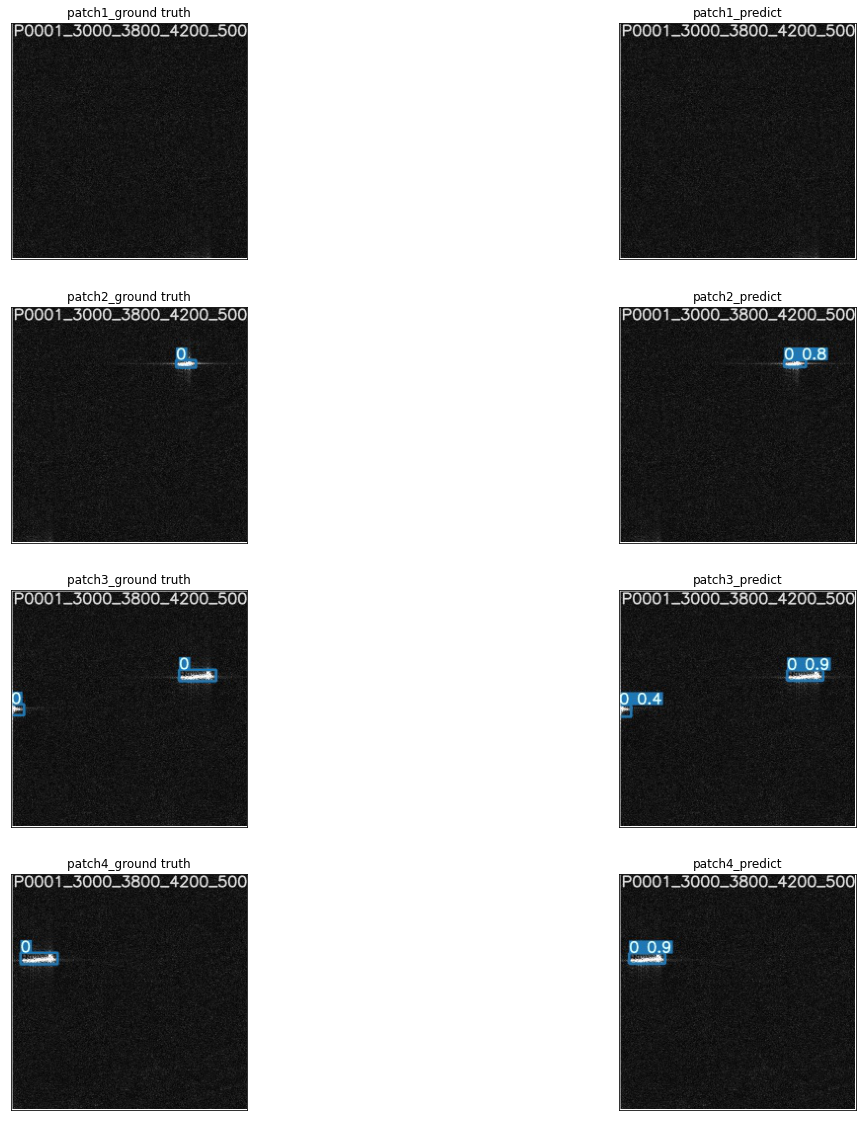

In [1]:
import os
import random
import matplotlib.pyplot as plt
import cv2
from PIL import Image

img_list = os.listdir('image/visualization')
img_list.sort()
rand_sample = random.sample(range(len(img_list)//8), 1)

sample_list = []
for i in range(8):
    sample_list.append(img_list[rand_sample[0]*8+i])
sample_list.sort()


fig = plt.figure()
fig, ax_lst = plt.subplots(4, 2, figsize=(20,20))
for i in range(4):
    for j in range(2):
        ax_lst[i][j].set_xticks([])
        ax_lst[i][j].set_yticks([])

img1 = Image.open(os.path.join('image/visualization', sample_list[0]))
img2 = Image.open(os.path.join('image/visualization', sample_list[1]))
img3 = Image.open(os.path.join('image/visualization', sample_list[2]))
img4 = Image.open(os.path.join('image/visualization', sample_list[3]))
img5 = Image.open(os.path.join('image/visualization', sample_list[4]))
img6 = Image.open(os.path.join('image/visualization', sample_list[5]))
img7 = Image.open(os.path.join('image/visualization', sample_list[6]))
img8 = Image.open(os.path.join('image/visualization', sample_list[7]))
    
ax_lst[0][0].set_title('patch1_ground truth')
ax_lst[0][0].imshow(img1)
ax_lst[0][1].set_title('patch1_predict')
ax_lst[0][1].imshow(img2)
ax_lst[1][0].set_title('patch2_ground truth')
ax_lst[1][0].imshow(img3)
ax_lst[1][1].set_title('patch2_predict')
ax_lst[1][1].imshow(img4)
ax_lst[2][0].set_title('patch3_ground truth')
ax_lst[2][0].imshow(img5)
ax_lst[2][1].set_title('patch3_predict')
ax_lst[2][1].imshow(img6)
ax_lst[3][0].set_title('patch4_ground truth')
ax_lst[3][0].imshow(img7)
ax_lst[3][1].set_title('patch4_predict')
ax_lst[3][1].imshow(img8)
plt.show()
